In [1]:
import pandas as pd
import matplotlib as plt
from IPython.display import display

In [2]:
from pathlib import Path
import os
file = Path(os.getcwd()).parent /"data" / "train_1" / "train_1.csv"
data = pd.read_csv(file)


In [3]:
mask = data['Page'].str.split('_').apply(lambda x: len(x) != 4)
problem_rows = data[mask]

display(problem_rows)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
11,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,...,8.0,17.0,18.0,48.0,19.0,14.0,9.0,23.0,11.0,7.0
12,All_your_base_are_belong_to_us_zh.wikipedia.or...,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,...,5.0,4.0,4.0,5.0,2.0,9.0,7.0,4.0,5.0,0.0
17,Apple_II_zh.wikipedia.org_all-access_spider,4.0,8.0,4.0,9.0,7.0,4.0,15.0,9.0,17.0,...,5.0,14.0,8.0,11.0,8.0,24.0,10.0,15.0,12.0,11.0
18,As_One_zh.wikipedia.org_all-access_spider,13.0,7.0,14.0,11.0,20.0,5.0,32.0,11.0,6.0,...,37.0,12.0,7.0,11.0,13.0,17.0,13.0,12.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pattern = r'^(?P<Title>.+)_(?P<Project>[^_]+)_(?P<Access>[^_]+)_(?P<Agent>[^_]+)$'

data[['Title', 'Project', 'Access', 'Agent']] = data['Page'].str.extract(pattern)

In [5]:
problem_rows = data[data[['Title', 'Project', 'Access', 'Agent']].isnull().any(axis=1)]
print(problem_rows)
# drop page column and reorder columns to have the new columns first
data = data.drop(columns=['Title'])
data['Title'] = data['Page']
data = data.drop(columns=['Page'])
display(data)

Empty DataFrame
Columns: [Page, 2015-07-01, 2015-07-02, 2015-07-03, 2015-07-04, 2015-07-05, 2015-07-06, 2015-07-07, 2015-07-08, 2015-07-09, 2015-07-10, 2015-07-11, 2015-07-12, 2015-07-13, 2015-07-14, 2015-07-15, 2015-07-16, 2015-07-17, 2015-07-18, 2015-07-19, 2015-07-20, 2015-07-21, 2015-07-22, 2015-07-23, 2015-07-24, 2015-07-25, 2015-07-26, 2015-07-27, 2015-07-28, 2015-07-29, 2015-07-30, 2015-07-31, 2015-08-01, 2015-08-02, 2015-08-03, 2015-08-04, 2015-08-05, 2015-08-06, 2015-08-07, 2015-08-08, 2015-08-09, 2015-08-10, 2015-08-11, 2015-08-12, 2015-08-13, 2015-08-14, 2015-08-15, 2015-08-16, 2015-08-17, 2015-08-18, 2015-08-19, 2015-08-20, 2015-08-21, 2015-08-22, 2015-08-23, 2015-08-24, 2015-08-25, 2015-08-26, 2015-08-27, 2015-08-28, 2015-08-29, 2015-08-30, 2015-08-31, 2015-09-01, 2015-09-02, 2015-09-03, 2015-09-04, 2015-09-05, 2015-09-06, 2015-09-07, 2015-09-08, 2015-09-09, 2015-09-10, 2015-09-11, 2015-09-12, 2015-09-13, 2015-09-14, 2015-09-15, 2015-09-16, 2015-09-17, 2015-09-18, 2015-09-

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Project,Access,Agent,Title
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider,2PM_zh.wikipedia.org_all-access_spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider,3C_zh.wikipedia.org_all-access_spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider,4minute_zh.wikipedia.org_all-access_spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,zh.wikipedia.org,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,13.0,3.0,5.0,10.0,es.wikipedia.org,all-access,spider,Underworld_(serie_de_películas)_es.wikipedia.o...
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,es.wikipedia.org,all-access,spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,es.wikipedia.org,all-access,spider,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,es.wikipedia.org,all-access,spider,Hasta_el_último_hombre_es.wikipedia.org_all-ac...


In [6]:
#Extract the country code from the Project column
data['CountryCode'] = data['Project'].str.extract(r'^(.*?)\.wikipedia\.org$', expand=False)

# Assign a unique numeric value to each country code (starting at 1)
data['Project_numeric'] = pd.factorize(data['CountryCode'])[0] + 1

data.drop(columns=['CountryCode'], inplace=True)
data = data.drop(columns=['Project'])

In [7]:
# Factorize the 'Access' column to assign each unique string a numeric value starting at 1
data['Access_numeric'] = pd.factorize(data['Access'])[0] + 1

# Display the first few rows to verify the changes
display(data[['Access', 'Access_numeric']].head())

data = data.drop(columns=['Access'])

,Access,Access_numeric
0,all-access,1
1,all-access,1
2,all-access,1
3,all-access,1
4,all-access,1


In [8]:
data['Agent_numeric'] = pd.factorize(data['Agent'])[0] + 1

# Display the first few rows to verify the changes
display(data[['Agent', 'Agent_numeric']].head())

data = data.drop(columns=['Agent'])
display(data)

,Agent,Agent_numeric
0,spider,1
1,spider,1
2,spider,1
3,spider,1
4,spider,1


,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Project_numeric,Access_numeric,Agent_numeric
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1_zh.wikipedia.org_all-access_spider,1,1,1
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM_zh.wikipedia.org_all-access_spider,1,1,1
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C_zh.wikipedia.org_all-access_spider,1,1,1
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute_zh.wikipedia.org_all-access_spider,1,1,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,13.0,3.0,5.0,10.0,Underworld_(serie_de_películas)_es.wikipedia.o...,7,1,1
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,7,1,1
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,7,1,1
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,7,1,1


In [9]:
# Define the date columns 
date_columns = data.columns[:-4]  # Assuming last 4 columns are Title, Project, Project_numeric, etc.

# Melt the dataframe to transform it into long format i.e. one row per Date-Pageview combo
df_long = data.melt(id_vars=['Title', 'Project_numeric', 'Access_numeric', 'Agent_numeric'],
                  value_vars=date_columns, var_name='Date', value_name='Views')  # Renamed 'Pageviews' to 'Views'

# Convert Date column to datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Drop any rows where Views are NaN (optional, depending on your needs)
df_long.dropna(subset=['Views'], inplace=True)

# Reset index after melting
df_long.reset_index(drop=True, inplace=True)

In [10]:
#checkifdataexists
try:
    train=read_csv('../data/train_1/train_1_train.csv')
    test=read_csv('../data/train_1/train_1_test.csv')
    data_loaded=True
except:
    
    # import scalar so we can normalize the data
    from sklearn.preprocessing import MinMaxScaler
    # Ensure 'Views' column is numeric
    df_long['Views'] = pd.to_numeric(df_long['Views'], errors='coerce')

    # Sort the data by Date
    df_long.sort_values(by=['Date'], inplace=True)

    # Create lag features (This is create a sequence of lagged values for each Title)
    # This is essentially turning the time series data into a supervised learning problem
    df_long['lag1'] = df_long.groupby('Title')['Views'].shift(1)
    df_long['lag2'] = df_long.groupby('Title')['Views'].shift(2)
    df_long['lag3'] = df_long.groupby('Title')['Views'].shift(3)
    df_long['lag4'] = df_long.groupby('Title')['Views'].shift(4)
    df_long['lag5'] = df_long.groupby('Title')['Views'].shift(5)
    df_long['lag6'] = df_long.groupby('Title')['Views'].shift(6)
    df_long['lag7'] = df_long.groupby('Title')['Views'].shift(7)

    # create date features
    df_long['dayofweek'] = df_long['Date'].dt.dayofweek
    df_long['dayofmonth'] = df_long['Date'].dt.day
    df_long['dayofyear'] = df_long['Date'].dt.dayofyear
    df_long['month'] = df_long['Date'].dt.month
    df_long['year'] = df_long['Date'].dt.year


    # remove rows with NaN values only want to predict on rows where we have all the data 
    # (we can deal with missing values in the future)
    df_long.dropna(subset=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7'], inplace=True)
    display(df_long.head())

    # Define train-test split date
    split_date = '2016-06-01'
    train = df_long[df_long['Date'] < split_date]
    test = df_long[df_long['Date'] >= split_date]

,Title,Project_numeric,Access_numeric,Agent_numeric,Date,Views,lag1,lag2,lag3,lag4,lag5,lag6,lag7,dayofweek,dayofmonth,dayofyear,month,year
954046,"Маяковский,_Владимир_Владимирович_ru.wikipedia...",4,1,2,2015-07-08,2343.0,1272.0,1163.0,1324.0,2237.0,2179.0,5938.0,1193.0,2,8,189,7,2015
954061,"Гафт,_Валентин_Иосифович_ru.wikipedia.org_all-...",4,1,2,2015-07-08,475.0,572.0,929.0,1121.0,4594.0,586.0,486.0,482.0,2,8,189,7,2015
954059,"Диас,_Ник_ru.wikipedia.org_all-access_all-agents",4,1,2,2015-07-08,105.0,70.0,77.0,106.0,82.0,115.0,94.0,77.0,2,8,189,7,2015
954060,"Танич,_Михаил_Исаевич_ru.wikipedia.org_all-acc...",4,1,2,2015-07-08,171.0,171.0,170.0,133.0,251.0,512.0,144.0,147.0,2,8,189,7,2015
954062,"Цекало,_Александр_Евгеньевич_ru.wikipedia.org_...",4,1,2,2015-07-08,554.0,475.0,425.0,517.0,651.0,468.0,450.0,531.0,2,8,189,7,2015


In [11]:
del df_long
del data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Reset indices to ensure alignment (if not already done)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Define features and target
static_features = ['Project_numeric', 'Access_numeric', 'Agent_numeric', 'dayofweek', 'dayofmonth', 'dayofyear', 'month', 'year']
sequence_features = ['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7']
target = 'Views'  

# Extract features and target ensuring a consistent index
X_train_static = train[static_features].values
X_train_sequence = train[sequence_features].reset_index(drop=True)
X_test_static  = test[static_features].values
X_test_sequence = test[sequence_features].reset_index(drop=True)
y_train = train[target].values
y_train = np.log1p(y_train)  # Apply log1p transformation to the target
y_test = test[target].values
y_test = np.log1p(y_test)  # Apply log1p transformation to the target


# Scale the static features using MinMaxScaler
static_features_scaler = MinMaxScaler()
X_train_static = static_features_scaler.fit_transform(X_train_static)
X_train_static = pd.DataFrame(X_train_static, columns=static_features)
X_test_static  = static_features_scaler.transform(X_test_static)
X_test_static = pd.DataFrame(X_test_static, columns=static_features)

# Apply the log1p transformation to the sequence features (this will preserve the index)
X_train_sequence = X_train_sequence.apply(np.log1p)
X_test_sequence = X_test_sequence.apply(np.log1p)

# Combine the scaled static features and transformed sequence features they are both dataframes
X_train = pd.concat([X_train_static, X_train_sequence], axis=1)
X_test = pd.concat([X_test_static, X_test_sequence], axis=1)
del X_train_static, X_test_static, X_train_sequence, X_test_sequence
X_train = X_train.values
X_test = X_test.values
# create a subset of the data to speed up the grid search
X_train = X_train[:20000]
y_train = y_train[:20000]
X_test = X_test[:20000]
y_test = y_test[:20000]


print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (20000, 15) (20000,)
Testing data shape: (20000, 15) (20000,)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [13]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000],          # Number of trees
    'max_depth': [3, 5, 10, None],                  # None = grow until all leaves are pure
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples at a leaf node
    'max_features': ['log2', 'sqrt', 0.6],          # Features to consider at split
    'bootstrap': [True, False],                     # Use bootstrap samples
}

In [15]:
rf = RandomForestRegressor(random_state=24)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,               # Try 50 random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,                    # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best RMSE score:", -random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END bootstrap=True, max_depth=5, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   6.9s
[CV] END bootstrap=True, max_depth=5, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total tim

/home/tim/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  47.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  48.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  48.8s
[CV] END bootstrap=True, max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.5s
[CV] END bootstrap=True, max_d

In [16]:
rf_params = {
    'n_estimators': 100,         # Similar to num_boost_round
    'max_depth': None,               # Like in your update_params
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': 'log2',          # Like colsample_bytree
    'bootstrap': True,            # Like subsample
    'random_state': 24,
    'n_jobs': -1,                 # Use all CPU cores
    'verbose': 1
}
best_rf_params = random_search.best_params_
# Increase total rounds, but use early stopping
rf = RandomForestRegressor(**best_rf_params)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.6, min_samples_leaf=2,
                      n_estimators=500)

In [18]:
# evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
predictions = rf.predict(X_test)
predictions = np.expm1(predictions)  # Inverse log1p transformation
labels = np.expm1(y_test)  # Inverse log1p transformation
rmse = np.sqrt(mean_squared_error(labels, predictions))
# Calculate MAE
mae = mean_absolute_error(labels, predictions)
# Calculate R2
r2 = r2_score(labels, predictions)

# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 3183.8502826104555
MAE: 205.73168247379542
R2: 0.9535894550078959


Index(['Title', 'Project_numeric', 'Access_numeric', 'Agent_numeric', 'Date',
       'Views', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7',
       'dayofweek', 'dayofmonth', 'dayofyear', 'month', 'year'],
      dtype='object')
Scaled features shape: (214, 15)
Article data shape: (214, 18)


/home/tim/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


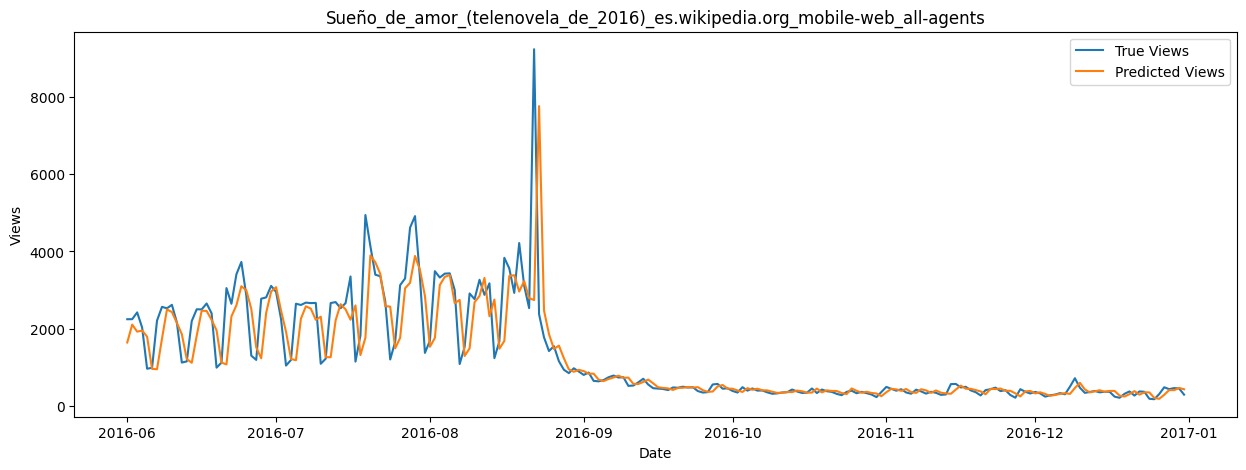

In [20]:
import matplotlib.pyplot as plt
# Select a valid article
article = test['Title'].iloc[0]
article_data = test[test['Title'] == article].copy()  # Use .copy() to avoid chained assignments
article_data = article_data.reset_index(drop=True)  # Reset index so indices align later

# Print columns to verify
print(article_data.columns)

# Define target and features if needed
target = 'Views'
# Example features list; adjust as required
features = ['Project_numeric', 'Access_numeric', 'Agent_numeric',  
            'dayofweek', 'dayofmonth', 'dayofyear', 'month', 'year', 
            'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7']

# ----------------------------------------------------------------------
# Process static features
scaled_static_features = static_features_scaler.transform(article_data[static_features])
scaled_static_features = pd.DataFrame(scaled_static_features, columns=static_features)
scaled_static_features = scaled_static_features.reset_index(drop=True)  # Reset index

# Process sequence features using log1p transformation
scaled_sequence_features = article_data[sequence_features].apply(np.log1p)
scaled_sequence_features = scaled_sequence_features.reset_index(drop=True)  # Reset index

# Concatenate static and sequence features
article_data_df = pd.concat([scaled_static_features, scaled_sequence_features], axis=1)

# Ensure the features are in the same order as during training
features = static_features + sequence_features
article_data_df = article_data_df[features]

# Convert to numpy array and then back to a DataFrame (for consistency)
scaled_features = article_data_df.values
scaled_features_df = pd.DataFrame(scaled_features, columns=features)

# Print shapes to verify they match
print("Scaled features shape:", scaled_features_df.shape)
print("Article data shape:", article_data.shape)

# Ensure the indices of both DataFrames match exactly
scaled_features_df = scaled_features_df.reset_index(drop=True)
article_data = article_data.reset_index(drop=True)

# Create the DMatrix using the feature DataFrame
dmat = scaled_features_df.values

# Generate predictions
predictions = rf.predict(dmat)
predictions = np.expm1(predictions)  # Inverse the log1p transformation

# Ensure prediction array length matches the article_data rows
if len(predictions) != len(article_data):
    raise ValueError(f"Length of predictions ({len(predictions)}) does not match number of article data rows ({len(article_data)})")

# Add predictions to article_data
article_data['Prediction'] = predictions

# Plot the true vs. predicted views
plt.figure(figsize=(15, 5))
plt.plot(article_data['Date'], article_data['Views'], label='True Views')
plt.plot(article_data['Date'], article_data['Prediction'], label='Predicted Views')
plt.title(article)
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()
